    ** This notebook consist of my code to extract image from audio file.
    ** Deep-Fake detection project

# New Imports Installation

In [1]:
!pip install moviepy

  Created wheel for moviepy: filename=moviepy-1.0.3-py3-none-any.whl size=110731 sha256=229eba4f78d17aeb5fd4d9944520b0c83333c6591bc97eb225e02452bb9629ae
  Stored in directory: c:\users\zeus\appdata\local\pip\cache\wheels\e4\a4\db\0368d3a04033da662e13926594b3a8cf1aa4ffeefe570cfac1
  Created wheel for proglog: filename=proglog-0.1.9-py3-none-any.whl size=6151 sha256=04d87fbdd63ac7b2cbc561e64f594418ffdbba72cce7854e3a13918a5d803f9e
  Stored in directory: c:\users\zeus\appdata\local\pip\cache\wheels\22\82\ff\56950e4b223a69eda3a2bdeaef2ae4b274c3d1ced9b5814c99
Successfully built moviepy proglog


In [2]:
!pip install librosa

  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23146 sha256=5ece2c9c4461dc6565606986dde805775db0e8529d1e80644b993a3f5a0925a6
  Stored in directory: c:\users\zeus\appdata\local\pip\cache\wheels\49\5a\e4\df590783499a992a88de6c0898991d1167453a3196d0d1eeb7
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320724 sha256=1bc4400842d3dc928c58774186867486f742dc14a9451129216c1c1ed9fded5f
  Stored in directory: c:\users\zeus\appdata\local\pip\cache\wheels\6f\d1\5d\f13da53b1dcbc2624ff548456c9ffb526c914f53c12c318bb4
Successfully built audioread resampy


In [57]:
!pip install opencv-python

# Load Libraries 

In [9]:
import numpy as np
import pandas as pd
import os
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import librosa
import moviepy.editor as mp
import librosa.display
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

In [3]:
import cv2
pd.set_option('max_colwidth', 999)
pd.set_option('display.max_columns', 999)
pd.set_option("display.max_rows", 999)

In [1]:
import swifter

# Load Data 

## Read Video

In [3]:
len(glob.glob("D://Work_Space//Patent Related Work//DeepFake//Data//train_sample_videos//*.mp4"))

400

## Video --> Audio --> Image

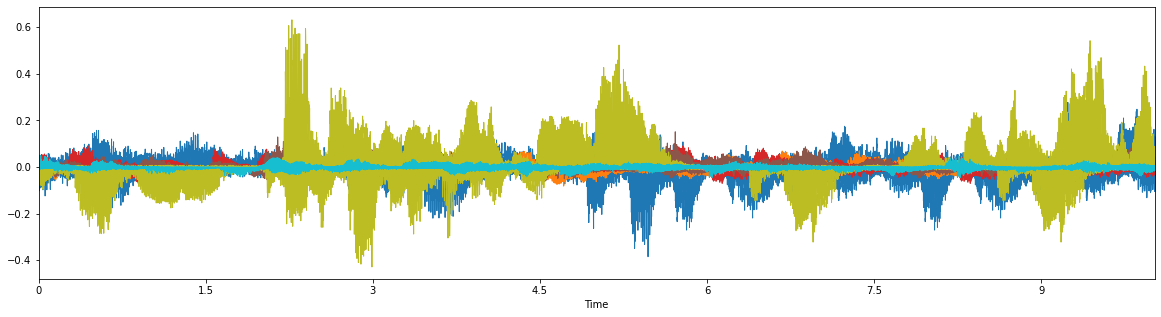

In [61]:
plt.figure(figsize=(20, 5))
[
    librosa.display.waveplot(mp.VideoFileClip(x).audio.to_soundarray().reshape(
        mp.VideoFileClip(x).audio.to_soundarray().shape[1],
        mp.VideoFileClip(x).audio.to_soundarray().shape[0]),
        sr=mp.VideoFileClip(x).audio.fps)
    for x in glob.glob(
        "D://Work_Space//Patent Related Work//DeepFake//Data//train_sample_videos//*.mp4"
    )[:10]
]

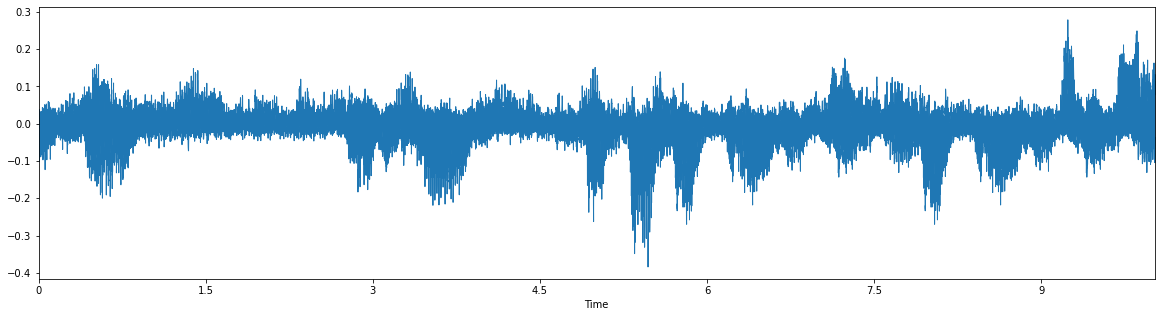

In [48]:
plt.figure(figsize=(20,5))
librosa.display.waveplot(mp.VideoFileClip(
        glob.glob(
            "D://Work_Space//Patent Related Work//DeepFake//Data//train_sample_videos//*.mp4"
        )[0]).audio.to_soundarray().reshape(2,441882),sr=44100)

In [47]:
mp.VideoFileClip(
        glob.glob(
            "D://Work_Space//Patent Related Work//DeepFake//Data//train_sample_videos//*.mp4"
        )[0]).audio.fps

44100

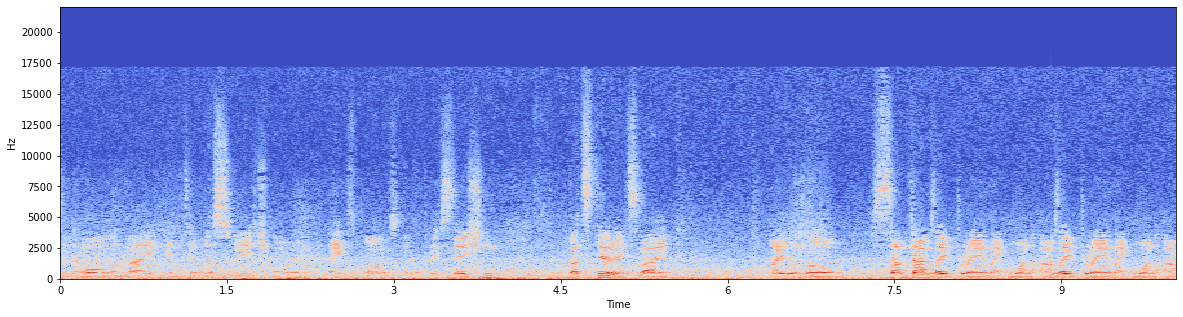

In [82]:
plt.figure(figsize=(20,5))
librosa.display.specshow(librosa.amplitude_to_db(
    abs(
        librosa.stft(
            mp.VideoFileClip(
                glob.glob(
                    "D://Work_Space//Patent Related Work//DeepFake//Data//train_sample_videos//*.mp4"
                )[0]).audio.to_soundarray()[:, 0]))),
    sr=44100,
    x_axis='time',
    y_axis='hz')

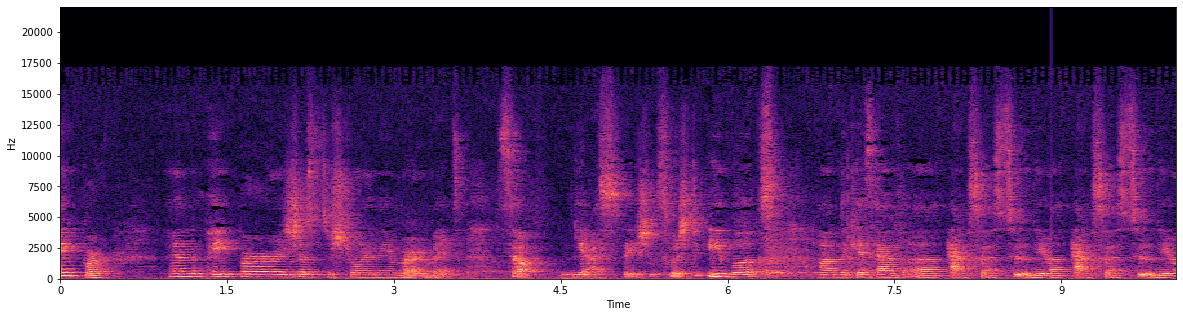

In [64]:
plt.figure(figsize=(20, 5))
[
    librosa.display.specshow(librosa.amplitude_to_db(
        abs(librosa.stft(mp.VideoFileClip(x).audio.to_soundarray()[:, 0]))),
                             sr=mp.VideoFileClip(x).audio.fps,
                             x_axis='time',
                             y_axis='hz')
    for x in glob.glob(
        "D://Work_Space//Patent Related Work//DeepFake//Data//train_sample_videos//*.mp4"
    )[:10]
]

In [51]:
librosa.stft(
            mp.VideoFileClip(
                glob.glob(
                    "D://Work_Space//Patent Related Work//DeepFake//Data//train_sample_videos//*.mp4"
                )[0]).audio.to_soundarray()[:,0]).shape

(1025, 864)

In [52]:
mp.VideoFileClip(
                glob.glob(
                    "D://Work_Space//Patent Related Work//DeepFake//Data//train_sample_videos//*.mp4"
                )[0]).audio.to_soundarray()[:,0].shape

(441882,)

In [ ]:
librosa.load()

## Write Audio Image

In [7]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

In [22]:
for x in glob.glob(
        "D://Work_Space//Patent Related Work//DeepFake//Data//train_sample_videos//*.mp4"
):
    fig = plt.Figure(figsize=(20, 5))
    canvas = FigureCanvas(fig)
    ax = fig.add_subplot(111)
    p = librosa.display.waveplot(
        mp.VideoFileClip(x).audio.to_soundarray().reshape(
            mp.VideoFileClip(x).audio.to_soundarray().shape[1],
            mp.VideoFileClip(x).audio.to_soundarray().shape[0]),
        sr=mp.VideoFileClip(x).audio.fps,
        ax=ax,
        x_axis=None)
    fig.savefig(
        os.path.join(
            "D://Work_Space//Patent Related Work//DeepFake//Data//Audio_images//Wave//",
            str(x.split("\\")[-1].split(".")[0]) + ".jpg"))
    del fig, canvas, ax, p
del x

In [23]:
for x in glob.glob(
        "D://Work_Space//Patent Related Work//DeepFake//Data//train_sample_videos//*.mp4"
):
    fig = plt.Figure(figsize=(20, 5))
    canvas = FigureCanvas(fig)
    ax = fig.add_subplot(111)
    p = librosa.display.specshow(librosa.amplitude_to_db(
        abs(librosa.stft(mp.VideoFileClip(x).audio.to_soundarray()[:, 0]))),
                                 sr=mp.VideoFileClip(x).audio.fps,
                                 ax=ax,
                                 x_axis='time',
                                 y_axis='hz')
    fig.savefig(
        os.path.join(
            "D://Work_Space//Patent Related Work//DeepFake//Data//Audio_images//Spectrogram//",
            str(x.split("\\")[-1].split(".")[0]) + ".jpg"))
    del fig, canvas, ax, p
del x

## Read MetaData

In [19]:
pd.read_json("D://Work_Space//Patent Related Work//DeepFake//Data//train_sample_videos//*.json",lines=False)

,aagfhgtpmv.mp4,aapnvogymq.mp4,abarnvbtwb.mp4,abofeumbvv.mp4,abqwwspghj.mp4,acifjvzvpm.mp4,acqfdwsrhi.mp4,acxnxvbsxk.mp4,acxwigylke.mp4,aczrgyricp.mp4,adhsbajydo.mp4,adohikbdaz.mp4,adylbeequz.mp4,aelfnikyqj.mp4,aelzhcnwgf.mp4,aettqgevhz.mp4,aevrfsexku.mp4,afoovlsmtx.mp4,agdkmztvby.mp4,agqphdxmwt.mp4,agrmhtjdlk.mp4,ahbweevwpv.mp4,ahdbuwqxit.mp4,ahfazfbntc.mp4,ahqqqilsxt.mp4,aipfdnwpoo.mp4,ajqslcypsw.mp4,ajwpjhrbcv.mp4,aklqzsddfl.mp4,aknbdpmgua.mp4,aknmpoonls.mp4,akvmwkdyuv.mp4,akxoopqjqz.mp4,akzbnazxtz.mp4,aladcziidp.mp4,alaijyygdv.mp4,alninxcyhg.mp4,altziddtxi.mp4,alvgwypubw.mp4,amaivqofda.mp4,amowujxmzc.mp4,andaxzscny.mp4,aneclqfpbt.mp4,anpuvshzoo.mp4,aorjvbyxhw.mp4,apatcsqejh.mp4,apgjqzkoma.mp4,apogckdfrz.mp4,aqpnvjhuzw.mp4,arkroixhey.mp4,arlmiizoob.mp4,arrhsnjqku.mp4,asaxgevnnp.mp4,asdpeebotb.mp4,aslsvlvpth.mp4,asmpfjfzif.mp4,asvcrfdpnq.mp4,atkdltyyen.mp4,atvmxvwyns.mp4,atxvxouljq.mp4,atyntldecu.mp4,atzdznmder.mp4,aufmsmnoye.mp4,augtsuxpzc.mp4,avfitoutyn.mp4,avgiuextiz.mp4,avibnnhwhp.mp4,avmjormvsx.mp4,avnqydkqjj.mp4,avssvvsdhz.mp4,avtycwsgyb.mp4,avvdgsennp.mp4,avywawptfc.mp4,awhmfnnjih.mp4,awnwkrqibf.mp4,awukslzjra.mp4,axczxisdtb.mp4,axntxmycwd.mp4,axoygtekut.mp4,axwgcsyphv.mp4,axwovszumc.mp4,aybgughjxh.mp4,aybumesmpk.mp4,ayqvfdhslr.mp4,aytzyidmgs.mp4,azpuxunqyo.mp4,azsmewqghg.mp4,bahdpoesir.mp4,bbhpvrmbse.mp4,bbhtdfuqxq.mp4,bbvgxeczei.mp4,bchnbulevv.mp4,bctvsmddgq.mp4,bdbhekrrwo.mp4,bddjdhzfze.mp4,bdgipnyobr.mp4,bdnaqemxmr.mp4,bdxuhamuqx.mp4,beboztfcme.mp4,bejhvclboh.mp4,benmsfzfaz.mp4,beyebyhrph.mp4,bffwsjxghk.mp4,bgaogsjehq.mp4,bggsurpgpr.mp4,bghphrsfxf.mp4,bgmlwsoamc.mp4,bguwlyazau.mp4,bgvhtpzknn.mp4,bgwmmujlmc.mp4,bhaaboftbc.mp4,bhbdugnurr.mp4,bhpwpydzpo.mp4,bhsluedavd.mp4,bilnggbxgu.mp4,bjjbwsqjir.mp4,bjkmjilrxp.mp4,bjsmaqefoi.mp4,bkmdzhfzfh.mp4,bkvetcojbt.mp4,bkwxhglwct.mp4,blpchvmhxx.mp4,blzydqdfem.mp4,bmbbkwmxqj.mp4,bmehkyanbj.mp4,bmhvktyiwp.mp4,bmioepcpsx.mp4,bmjmjmbglm.mp4,bmjzrlszhi.mp4,bnbuonyoje.mp4,bndybcqhfr.mp4,bnjcdrfuov.mp4,bntlodcfeg.mp4,bofqajtwve.mp4,boovltmuwi.mp4,bopqhhalml.mp4,bourlmzsio.mp4,bpapbctoao.mp4,bpwzipqtxf.mp4,bpxckdzddv.mp4,bqdjzqhcft.mp4,bqeiblbxtl.mp4,bqhtpqmmqp.mp4,bqkdbcqjvb.mp4,bqnymlsayl.mp4,bqqpbzjgup.mp4,bqtuuwzdtr.mp4,brhalypwoo.mp4,brvqtabyxj.mp4,brwrlczjvi.mp4,bseamdrpbj.mp4,bsfmwclnqy.mp4,bsqgziaylx.mp4,btiysiskpf.mp4,btjlfpzbdu.mp4,btjwbtsgln.mp4,btmsngnqhv.mp4,btohlidmru.mp4,btugrnoton.mp4,btunxncpjh.mp4,btxlttbpkj.mp4,bulkxhhknf.mp4,bvgwelbeof.mp4,bvzjkezkms.mp4,bweezhfpzp.mp4,bwhlgysghg.mp4,bwipwzzxxu.mp4,bwuwstvsbw.mp4,bxzakyopjf.mp4,bydaidkpdp.mp4,byfenovjnf.mp4,byijojkdba.mp4,byofowlkki.mp4,byqzyxifza.mp4,byunigvnay.mp4,byyqectxqa.mp4,bzmdrafeex.mp4,bzythlfnhq.mp4,caifxvsozs.mp4,caqbrkogkb.mp4,cbbibzcoih.mp4,cbltdtxglo.mp4,ccfoszqabv.mp4,ccmonzqfrz.mp4,cdaxixbosp.mp4,cdbsbdymzd.mp4,cdphtzqrvp.mp4,cdyakrxkia.mp4,cepxysienc.mp4,cettndmvzl.mp4,ceymbecxnj.mp4,cferslmfwh.mp4,cffffbcywc.mp4,cfxkpiweqt.mp4,cfyduhpbps.mp4,cglxirfaey.mp4,cgvrgibpfo.mp4,chtapglbcj.mp4,chviwxsfhg.mp4,chzieimrwu.mp4,ciyoudyhly.mp4,cizlkenljw.mp4,ckbdwedgmc.mp4,ckjaibzfxa.mp4,ckkuyewywx.mp4,cknyxaqouy.mp4,cksanfsjhc.mp4,clihsshdkq.mp4,clrycekyst.mp4,cmbzllswnl.mp4,cmxcfkrjiv.mp4,cnilkgvfei.mp4,coadfnerlk.mp4,cobjrlugvp.mp4,covdcysmbi.mp4,cpjxareypw.mp4,cppdvdejkc.mp4,cprhtltsjp.mp4,cqfugiqupm.mp4,cqhngvpgyi.mp4,cqrskwiqng.mp4,crezycjqyk.mp4,crktehraph.mp4,crzfebnfgb.mp4,cthdnahrkh.mp4,ctpqeykqdp.mp4,cttqtsjvgn.mp4,ctzmavwror.mp4,curpwogllm.mp4,cuzrgrbvil.mp4,cvaksbpssm.mp4,cwbacdwrzo.mp4,cwqlvzefpg.mp4,cwrtyzndpx.mp4,cwsbspfzck.mp4,cwwandrkus.mp4,cxfujlvsuw.mp4,cxrfacemmq.mp4,cxttmymlbn.mp4,cyboodqqyr.mp4,cycacemkmt.mp4,cyclgfjdrv.mp4,cyxlcuyznd.mp4,czfunozvwp.mp4,czkdanyadc.mp4,czmqpxrqoh.mp4,dafhtipaml.mp4,dakiztgtnw.mp4,dakqwktlbi.mp4,dbhoxkblzx.mp4,dbhrpizyeq.mp4,dbnygxtwek.mp4,dboxtiehng.mp4,dbtbbhakdv.mp4,dbzcqmxzaj.mp4,dbzpcjntve.mp4,dcamvmuors.mp4,dcuiiorugd.mp4,ddepeddixj.mp4,ddhfabwpuz.mp4,ddjggcasdw.mp4,ddpvuimigj.mp4,ddqccgmtka.mp4,degpbqvcay.mp4,deywhkarol.mp4,deyyistcrd.mp4,dfbpceeao

#### Original 

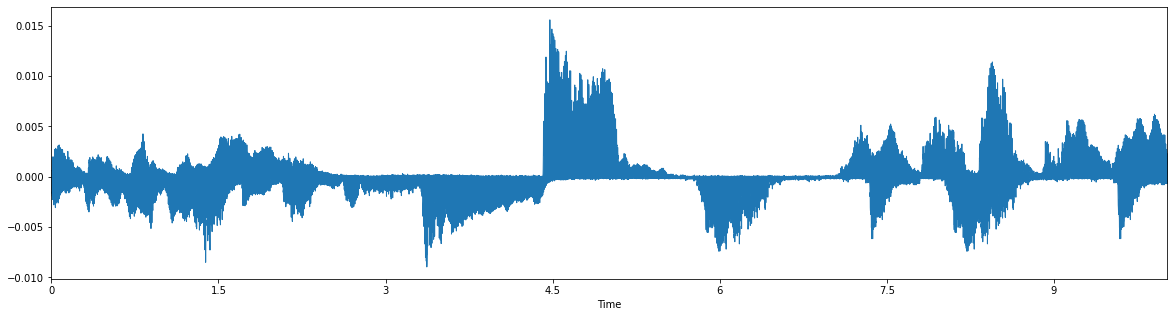

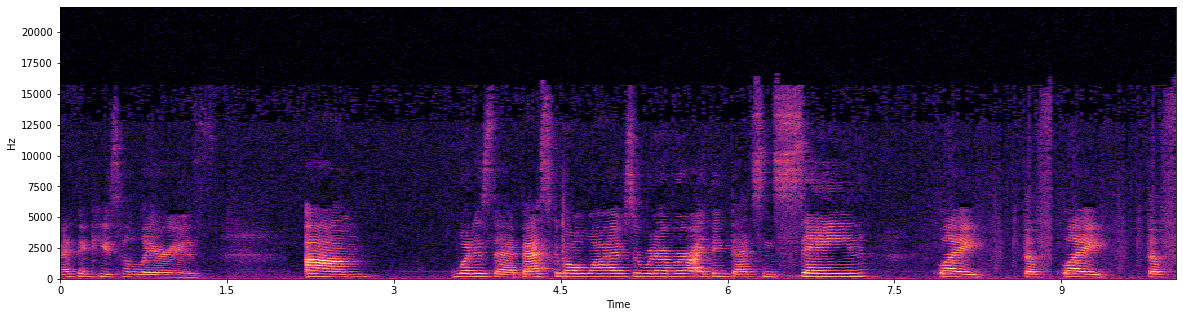

In [16]:
plt.figure(figsize=(20, 5))
librosa.display.waveplot(mp.VideoFileClip(
    "D://Work_Space//Patent Related Work//DeepFake//Data//train_sample_videos//efwfxwwlbw.mp4"
).audio.to_soundarray().reshape(2, 441882),
                         sr=44100)
print("=======================================")
plt.figure(figsize=(20, 5))
librosa.display.specshow(librosa.amplitude_to_db(
    abs(
        librosa.stft(
            mp.VideoFileClip(
                "D://Work_Space//Patent Related Work//DeepFake//Data//train_sample_videos//efwfxwwlbw.mp4"
            ).audio.to_soundarray()[:, 0]))),
                         sr=44100,
                         x_axis='time',
                         y_axis='hz')

#### Fake

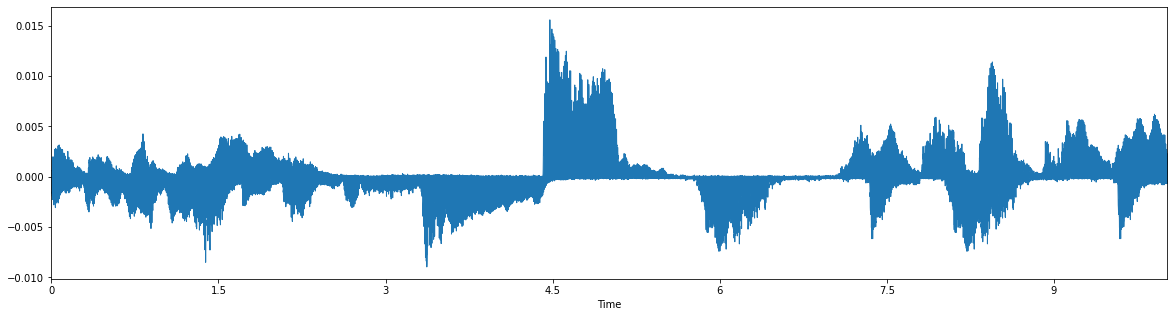

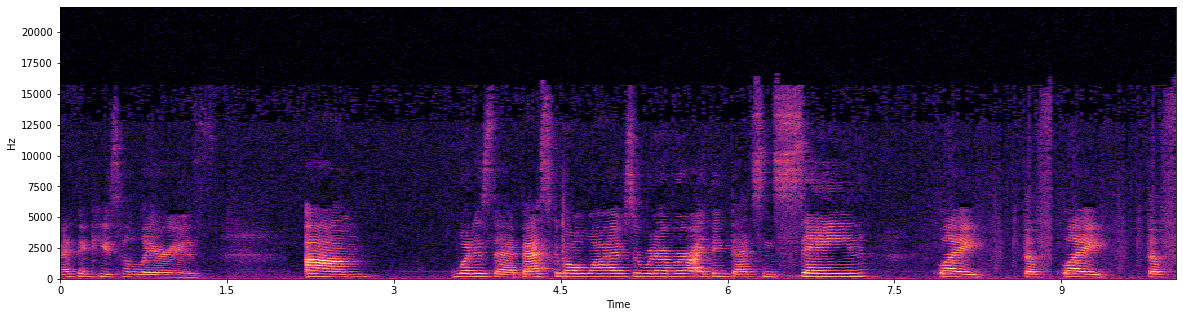

In [17]:
plt.figure(figsize=(20, 5))
librosa.display.waveplot(mp.VideoFileClip(
    "D://Work_Space//Patent Related Work//DeepFake//Data//train_sample_videos//avnqydkqjj.mp4"
).audio.to_soundarray().reshape(2, 441882),
                         sr=44100)
print("=======================================")
plt.figure(figsize=(20, 5))
librosa.display.specshow(librosa.amplitude_to_db(
    abs(
        librosa.stft(
            mp.VideoFileClip(
                "D://Work_Space//Patent Related Work//DeepFake//Data//train_sample_videos//avnqydkqjj.mp4"
            ).audio.to_soundarray()[:, 0]))),
                         sr=44100,
                         x_axis='time',
                         y_axis='hz')

# ||rl implementation for Image Creation

In [4]:
data = pd.DataFrame({
    'location':
    glob.glob(
        "D://Work_Space//Patent Related Work//DeepFake//Data//train_sample_videos//*.mp4"
    )
})
data.head()

,location
0,D://Work_Space//Patent Related Work//DeepFake//Data//train_sample_videos\aagfhgtpmv.mp4
1,D://Work_Space//Patent Related Work//DeepFake//Data//train_sample_videos\aapnvogymq.mp4
2,D://Work_Space//Patent Related Work//DeepFake//Data//train_sample_videos\abarnvbtwb.mp4
3,D://Work_Space//Patent Related Work//DeepFake//Data//train_sample_videos\abofeumbvv.mp4
4,D://Work_Space//Patent Related Work//DeepFake//Data//train_sample_videos\abqwwspghj.mp4


In [5]:
def create_spectrual(
    location,
    directory="D://Work_Space//Patent Related Work//DeepFake//Data//Audio_images//Spectrogram_1//"
):

    fig = plt.Figure(figsize=(20, 5))
    canvas = FigureCanvas(fig)
    ax = fig.add_subplot(111)
    p = librosa.display.specshow(librosa.amplitude_to_db(
        abs(
            librosa.stft(
                mp.VideoFileClip(location).audio.to_soundarray()[:, 0]))),
                                 sr=mp.VideoFileClip(location).audio.fps,
                                 ax=ax,
                                 x_axis='time',
                                 y_axis='hz')

    frame_path = os.path.join(directory,
                              str(location.split("\\")[-1].split(".")[0]))
    if not os.path.exists(frame_path):
        os.mkdir(frame_path)
    fig.savefig(
        os.path.join(frame_path,
                     str(location.split("\\")[-1].split(".")[0]) + ".jpg"))
    del fig, canvas, ax, p

In [6]:
def create_wave(
    location,
    directory="D://Work_Space//Patent Related Work//DeepFake//Data//Audio_images//Wave_1//"
):

    fig = plt.Figure(figsize=(20, 5))
    canvas = FigureCanvas(fig)
    ax = fig.add_subplot(111)
    p = librosa.display.waveplot(
        mp.VideoFileClip(location).audio.to_soundarray().reshape(
            mp.VideoFileClip(location).audio.to_soundarray().shape[1],
            mp.VideoFileClip(location).audio.to_soundarray().shape[0]),
        sr=mp.VideoFileClip(location).audio.fps,
        ax=ax,
        x_axis=None)

    frame_path = os.path.join(directory,
                              str(location.split("\\")[-1].split(".")[0]))
    if not os.path.exists(frame_path):
        os.mkdir(frame_path)
    fig.savefig(
        os.path.join(frame_path,
                     str(location.split("\\")[-1].split(".")[0]) + ".jpg"))
    del fig, canvas, ax, p

In [7]:
def vector_apply(data, col='location', wave=0):
    if wave == 0:
        data[col].swifter.set_npartitions(8).apply(create_spectrual)
    else:
        data[col].swifter.set_npartitions(8).apply(create_wave)

In [10]:
vector_apply(data)

In [11]:
vector_apply(data,wave=1)